In [1]:
# Seguimos con el ejemplo de nn_cancer_datasetbinaryclass_example.ipynb.
# Ahora vamos a hacer algunas pruebas adicionales para 
# 1. evaluar el performance para distintas learning rates
# 2. parar el algoritmo cuando ya no hay mejora en el performance.

In [1]:
# paquetes para analisis de datos
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# paquetes para Keras

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
#from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_val_score

# Mejor esta alternativa
import tensorflow as tf
import matplotlib.pyplot as plt
layers = tf.keras.layers

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [33]:
# carga de datos

data = pd.read_csv("cancer.csv", header=0) # Row number(s) to use as the column names, and the start of the data. Default behavior is to infer the column names: if no names are passed the behavior is identical to header=0 and column names are inferred from the first line of the file

#seed = 5
#numpy.random.seed(seed)

print(data.head(2))

       id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0  842302         M        17.99         10.38           122.8     1001.0   
1  842517         M        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33            184.6      2019.0            0.1622   
1  ...          23.41            158.8      1956.0            0.1238   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [34]:
# tenemos 32 columnas sin nombre! las vamos a quitar
data.drop("Unnamed: 32",axis=1,inplace=True)  # inplace = does not return a copy
data.drop("id", axis=1, inplace=True)

In [6]:
# chequeo
# Check whether the column has been dropped
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [35]:
# seleccionamos columnas que nos interesen

prediction_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = data[prediction_var].values
Y = data.diagnosis.values

In [36]:
# Las clases (diagnosticos) son texto. Los vamos a cambiar a valor numerico utilizando
# LabelEncoder

#from keras.utils import to_categorical
#y_binary = to_categorical(y_int)

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

print(encoded_Y) # [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [18]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# Vamos a ver el efecto de ca,biar el learning rate (LR) en el proceso de optimziacion.
# Vamos a poner un LR bien bajo, uno bien alto, y otro termino medio.
# Consideremos que un valor muy bajo o muy alto no es bueno para el proceso de minimizacion.

# Comenzaremos por definir una funcion que establece la arquitectura del modelo. Vamos
# a considerar la misma arquitectura que antes: capa de entrada con 30 atributos, una escondida
# con 10 neuronas activacion RELU y la de salida con activación sigmoid.

# por default, el LR en keras es de 0.001.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def nuevo_modelo():
    model = Sequential()
    model.add(Dense(10, input_dim=30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    return(model)

# y definimos los LR
lr_to_test = [0.000001, 0.01, 1]

# vamos a importar SGD (stochastic gradien descent) 
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

In [27]:
# Ahora hacemos el loop sobre el mismo modelo con los distintos LR

for lr in lr_to_test:
    print('\n\n Testeo de modelo con LR: %f\n'%lr )
    
    # Inicializamos nuevo modelo 
    model = nuevo_modelo()
    
    # inicializamos el optimizador con mi propio LR. 
    my_optimizer = SGD(lr=lr)
    
    # compilar
    model.compile(optimizer = my_optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
    
    # fiteo
    model.fit(X, encoded_Y) # default: batch size = 32, epoch = 1
    #model.fit(X, encoded_Y, batch_size=256, epochs=1000, verbose=2, validation_split=0.2)



 Testeo de modelo con LR: 0.000001

569/569 [==============================] - 0s 502us/sample - loss: 1.6425 - acc: 0.6274


 Testeo de modelo con LR: 0.010000

569/569 [==============================] - 0s 486us/sample - loss: 5.7587 - acc: 0.6098


 Testeo de modelo con LR: 1.000000

569/569 [==============================] - 0s 511us/sample - loss: 0.7046 - acc: 0.5923


In [38]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# Ahora veamos el paro del algoritmo.

# En cada epoch (una pasada por todo el set de training), se calcula la 
# medida de desempeño y el loss en el train y con el set de validacion.
# La idea es que veamos que por cada epoch, la performance vaya mejorando
# y que pare cuando ya no haya mejora. Esto se puede hacer con el 
# "Early stopping".
# Podemos utilizar Early stopping con:

from tensorflow.keras.callbacks import EarlyStopping
#from keras.callbacks import EarlyStopping


In [41]:
# Especificamos el modelo igual que antes:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=30, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Y ahora definimos el early_stopping_monitor
early_stopping_monitor =  EarlyStopping(patience=2)

# fiteo
#history = model.fit(X, encoded_Y, batch_size=256, epochs=10, verbose=1, validation_split=0.2) # original
history = model.fit(X, encoded_Y, batch_size=256, epochs=10, verbose=1, validation_split=0.2, callbacks = [early_stopping_monitor])

# # Aqui lo que hacemos es que si el modelo no mejora (diminuye el loss) luego de 2 epoch
# entonces, paramos (patience=2).



Train on 455 samples, validate on 114 samples
Epoch 1/10
455/455 [==============================] - 0s 1ms/sample - loss: 2.6584 - acc: 0.4088 - val_loss: 3.2068 - val_acc: 0.2281
Epoch 2/10
455/455 [==============================] - 0s 18us/sample - loss: 2.3358 - acc: 0.4088 - val_loss: 2.7846 - val_acc: 0.2281
Epoch 3/10
455/455 [==============================] - 0s 84us/sample - loss: 2.0276 - acc: 0.4088 - val_loss: 2.3833 - val_acc: 0.2281
Epoch 4/10
455/455 [==============================] - 0s 18us/sample - loss: 1.7316 - acc: 0.4088 - val_loss: 2.0026 - val_acc: 0.2281
Epoch 5/10
455/455 [==============================] - 0s 17us/sample - loss: 1.4587 - acc: 0.4088 - val_loss: 1.6445 - val_acc: 0.2281
Epoch 6/10
455/455 [==============================] - 0s 17us/sample - loss: 1.1931 - acc: 0.4088 - val_loss: 1.3159 - val_acc: 0.2281
Epoch 7/10
455/455 [==============================] - 0s 18us/sample - loss: 0.9639 - acc: 0.4088 - val_loss: 1.0259 - val_acc: 0.2281
Epoch 8/10

In [43]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

# lo anterior podria ser util para comparar modelos.
# Vamos a generar 2 modelos: model1 (el mismo que antes) y modelo2, que es el modelo original pero con una capa escondida
# adicional con 10 neuronas:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

early_stopping_monitor =  EarlyStopping(patience=2)

# modelo 1
model1 = Sequential()
model1.add(Dense(10, input_dim=30, kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#modelo 2
model2 = Sequential()
model2.add(Dense(10, input_dim=30, kernel_initializer='normal', activation='relu'))
model2.add(Dense(10, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fiteo de modelos
history1 = model1.fit(X, encoded_Y, batch_size=256, epochs=10, verbose=0, validation_split=0.2, callbacks = [early_stopping_monitor])
history2 = model2.fit(X, encoded_Y, batch_size=256, epochs=10, verbose=0, validation_split=0.2, callbacks = [early_stopping_monitor])



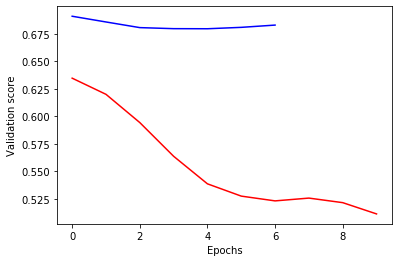

In [44]:
# Y ahora la parte mas entretenida: el ploteo para comparar

plt.plot(history1.history['val_loss'], 'r', history2.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()



In [ ]:
# Podemos ver que agregar una capa adicional NO mejora en nada las cosas, de hecho las empeora.
# Trabajo in situ:

#Desarrolle pruebas por Ud mismo que intente mejorar el modelo base (model1) utilizando el mismo esquema mostrado aquí.